In [1]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite",echo=False)

In [3]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['Measurement', 'Station']

In [4]:
Measurement = Base.classes.Measurement
Station = Base.classes.Station
session = Session(engine)
#for row in session.query(Station).all():
#    print(row)

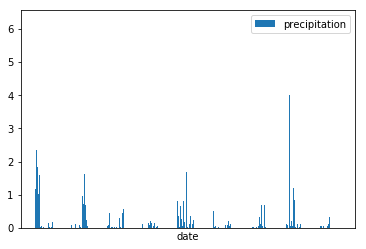

In [5]:
#precipitation analysis

import datetime as dt

start_date=dt.datetime.now()-dt.timedelta(days=365)
start_date=start_date.strftime("%Y-%m-%d")


prcp_12m=session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date > start_date).\
    order_by(Measurement.date).all()
#prcp_12m

prcp_df=pd.DataFrame(prcp_12m,columns=['date','precipitation'])
prcp_df.set_index('date',inplace=True)
prcp_df.plot.bar()

ticks=[]
for i in range(0,6):
    ticks.append(prcp_12m[int(len(prcp_df)/6)*i][0])
#print(ticks)
plt.xticks([])
plt.show()

Number of stations:  9
The most active station is USC00519281


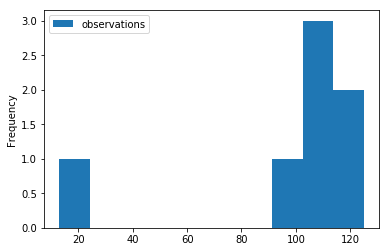

In [6]:
#station analysis

stat_num=session.query(Measurement.station).distinct().count()
print("Number of stations: ",stat_num)

most_active=session.query(Measurement.station,func.count(Measurement.station)).\
            group_by(Measurement.station).\
            order_by(Measurement.station).all()
most_active.sort(key=lambda x: x[1], reverse=True)

print("The most active station is",most_active[0][0])

tobs_12m=session.query(Measurement.station,func.count(Measurement.tobs)).\
    filter(Measurement.date > start_date).\
    group_by(Measurement.station).\
    order_by(Measurement.station).all()
   
    
tobs_df=pd.DataFrame(tobs_12m,columns=['station','observations'])
tobs_df.set_index('station',inplace=True)
tobs_df.plot.hist() #only one station is underperforming

plt.show()

In [13]:
#temperature analysis

def calc_temps(date1, date2):
    min_temp=session.query(func.min(Measurement.tobs)).\
                filter(Measurement.date > date1).\
                filter(Measurement.date < date2)
    print('Minimum temperature for the daterange was ',min_temp.first()[0])
    max_temp=session.query(func.max(Measurement.tobs)).\
                filter(Measurement.date > date1).\
                filter(Measurement.date < date2)
    print('Maximum temperature for the daterange was ',max_temp.first()[0])

    avg_temp=session.query(func.avg(Measurement.tobs)).\
                filter(Measurement.date > date1).\
                filter(Measurement.date < date2)
    print('Average temperature for the daterange was ',round(avg_temp.first()[0],1))
    
    return min_temp, max_temp, avg_temp

date_start=''
date_end=''
data_ok=True
while data_ok:
    date_start=input('Please input start date as YYYY-MM-DD')
    date_end=input('Please input end date as YYYY-MM-DD')
    if (date_start>date_end) :
        print ('Your dates are incorrect. Please, input them again')
    else:
        data_ok=False   

min_temp, max_temp, avg_temp=calc_temps(date_start,date_end)
    
    

Please input start date as YYYY-MM-DD2017-01-01
Please input end date as YYYY-MM-DD2017-01-10
Minimum temperature for the daterange was  60
Maximum temperature for the daterange was  77
Average temperature for the daterange was  68.0


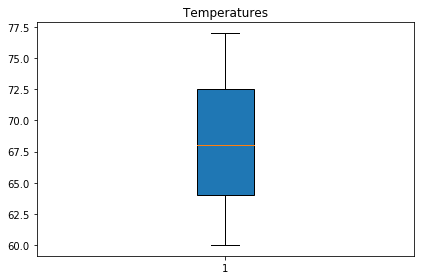

In [21]:
import numpy as np

fig, ax = plt.subplots()

x = range(3)
ax.boxplot([min_temp.first()[0],max_temp.first()[0],avg_temp.first()[0]], patch_artist=True)
ax.set_title('Temperatures')
fig.tight_layout()
plt.show()

In [7]:
#experiment!
###################
start_date=dt.datetime.now()-dt.timedelta(days=365)
start_date=start_date.strftime("%Y-%m-%d")

tobs_12m=session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.date > start_date).\
    order_by(Measurement.date).all()

print(tobs_12m)

[('2017-04-16', 74), ('2017-04-16', 69), ('2017-04-16', 74), ('2017-04-16', 71), ('2017-04-16', 71), ('2017-04-17', 74), ('2017-04-17', 69), ('2017-04-17', 71), ('2017-04-17', 67), ('2017-04-17', 69), ('2017-04-18', 75), ('2017-04-18', 70), ('2017-04-18', 76), ('2017-04-18', 75), ('2017-04-18', 76), ('2017-04-18', 68), ('2017-04-18', 71), ('2017-04-19', 74), ('2017-04-19', 70), ('2017-04-19', 83), ('2017-04-19', 74), ('2017-04-19', 67), ('2017-04-19', 71), ('2017-04-20', 78), ('2017-04-20', 75), ('2017-04-20', 74), ('2017-04-20', 76), ('2017-04-20', 76), ('2017-04-20', 69), ('2017-04-21', 73), ('2017-04-21', 70), ('2017-04-21', 70), ('2017-04-21', 70), ('2017-04-21', 69), ('2017-04-21', 70), ('2017-04-22', 76), ('2017-04-22', 74), ('2017-04-22', 74), ('2017-04-22', 72), ('2017-04-22', 73), ('2017-04-23', 77), ('2017-04-23', 75), ('2017-04-23', 76), ('2017-04-23', 70), ('2017-04-24', 77), ('2017-04-24', 76), ('2017-04-24', 68), ('2017-04-24', 75), ('2017-04-25', 77), ('2017-04-25', 75),